In [0]:
from google.colab import drive

In [2]:
drive.mount("/content/drive",force_remount=True)
%cd drive/My\ Drive
%cd variationAutoencoder/

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/variationAutoencoder


In [3]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# Now we can define the class for variational auto encoder 


class variational_autoencoder:

  def __init__(self,input_size):
    self.input_size  =  input_size
    self.output_size = 10
    self.definePLaceholder()
    self.defineweights()
    
  def definePLaceholder(self):
    self.X =  tf.placeholder(dtype=tf.float32,shape=(None,self.input_size),name="input")
    self.Y =  tf.placeholder(dtype=tf.float32,shape=(None),name='output')
    self.textX = tf.placeholder(dtype=tf.float32,shape=(None,2),name="test")
  
  def defineweights(self):

    with tf.variable_scope("weights",reuse=tf.AUTO_REUSE):
      self.filter1 = tf.get_variable(name="filter1",shape=(self.input_size,512),initializer=tf.initializers.glorot_normal,trainable=True)


      self.filter2 = tf.get_variable(name="filter2",shape=(512,256),initializer=tf.initializers.glorot_normal,trainable=True)

      
      self.mean = tf.get_variable(name="mean",shape=(256,2),initializer=tf.initializers.glorot_normal,trainable=True)
      self.sigma = tf.get_variable(name="sigma",shape=(256,2),initializer=tf.initializers.glorot_normal,trainable=True)


      self.filter_transpose = tf.get_variable(name="filter_transpose",shape=(2,256),initializer=tf.initializers.glorot_normal,trainable=True)

      self.filter_transpose1 = tf.get_variable(name="filter_transpose1",shape=(256,512),initializer=tf.initializers.glorot_normal,trainable=True)

      self.filter_transpose2 = tf.get_variable(name="filter_transpose2",shape=(512,self.input_size),initializer=tf.initializers.glorot_normal,trainable=True)


  def testing(self):

    dense_transpose = tf.matmul(self.textX,self.filter_transpose)
    dense_transpose = tf.nn.relu(dense_transpose)

    dense_transpose =  tf.matmul(dense_transpose,self.filter_transpose1)
    dense_transpose = tf.nn.relu(dense_transpose)

    output =  tf.matmul(dense_transpose,self.filter_transpose2)
    output = tf.nn.sigmoid(output)

    return output









  def structuredesign(self):

    # encoder 
    with tf.variable_scope("trainer",reuse=tf.AUTO_REUSE) as scope:
      dense = tf.matmul(self.X,self.filter1)
      dense = tf.nn.tanh(dense)
     
      dense  = tf.matmul(dense,self.filter2)
      dense  = tf.nn.tanh(dense)

      # mean and sigma 
      mean  = tf.matmul(dense,self.mean)
      sigma = tf.matmul(dense,self.sigma)


      # sampling the data from the mean and sigma mean +sigma*epsilon

      epsilon =  tf.random_normal(tf.shape(sigma),mean=0., stddev=1.0)
      z  =  mean + tf.exp(0.5*sigma)*epsilon


      # decoder 

      dense_transpose = tf.matmul(z,self.filter_transpose)
      dense_transpose = tf.nn.tanh(dense_transpose)

      dense_transpose =  tf.matmul(dense_transpose,self.filter_transpose1)
      dense_transpose = tf.nn.tanh(dense_transpose)

      output =  tf.matmul(dense_transpose,self.filter_transpose2)
      output = tf.nn.sigmoid(output)



      return mean,sigma,output

  

   








Loss after 0 is 7.861475


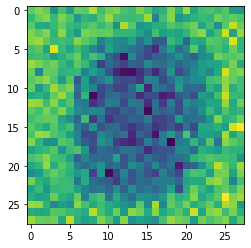

KeyboardInterrupt: ignored

In [48]:

with tf.Graph().as_default():
  vae = variational_autoencoder(784)
  mean,sigma,output = vae.structuredesign()
  testedImage  = vae.testing()
  batch_size = 64
  kl_divergence  = -0.5*tf.reduce_sum(1 + sigma -tf.square(mean) - tf.exp(sigma),1)
  marginal_likelihood = -tf.reduce_sum(vae.X * tf.log(1e-10 + output) + (1 - vae.X) * tf.log(1e-10 + 1 - output), 1)
  loss = tf.reduce_mean(kl_divergence + marginal_likelihood)
  optimizer  = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(loss)

  init = tf.initialize_all_variables()
  error = 0
  with tf.Session()  as sess:
    sess.run(init)
    for epc in range(100):
      no_batch = int(mnist.train.num_examples/batch_size)

      for each_batch in range(no_batch):
        _xtrain,_ytrain = mnist.train.next_batch(batch_size)
        _,error  = sess.run([optimizer,loss],feed_dict={vae.X:_xtrain/255.0,vae.Y:_ytrain})

      if epc % 5==0:

        print("Loss after "+str(epc)+" is "+ str(error))
        # we can test the image
        random_image  = np.random.normal(size=(1,2))
        output_image = sess.run([testedImage],feed_dict={vae.textX:random_image})
        output_image  = output_image[0].reshape(28,28)
        plt.imshow(output_image)
        plt.show()
              
                   

              

In [50]:
!sudo apt install git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [52]:
!git clone https://github.com/Anurich/variationalEncoder.git

Cloning into 'variationalEncoder'...


In [60]:
!git init

Initialized empty Git repository in /content/drive/My Drive/variationAutoencoder/.git/


In [61]:
%cd variationalEncoder/ 

/content/drive/My Drive/variationAutoencoder/variationalEncoder


In [63]:
%cd ..

/content/drive/My Drive/variationAutoencoder


In [0]:
!git add variationalAutoencoder.ipynb

In [71]:
!git commit --m="variationalEnocder"

[master (root-commit) 6bcaf12] variationalEnocder
 1 file changed, 1 insertion(+)
 create mode 100644 variationalAutoencoder.ipynb


In [73]:
!git push

fatal: No configured push destination.
Either specify the URL from the command-line or configure a remote repository using

    git remote add <name> <url>

and then push using the remote name

    git push <name>



In [0]:
!git config --global user.email "nautiyalanupam98@gmail.com"
!git config --global user.name "Anurich"